BERT for fake news classification

pip install spacy

python -m spacy download en_core_web_sm

pip install wordcloud

pip install gensim

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
import gensim
import re

In [9]:
import os

os.getcwd()

'/Users/admin/Desktop/moreML/FakeNewsDetection/data'

In [10]:
# load data
fake_df = pd.read_csv('./rawdata/Fake.csv')
true_df = pd.read_csv('./rawdata/True.csv')

Merge and check balance of dataset

In [11]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [12]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [13]:
# combine data into one df
fake_df['category'] = 1
true_df['category'] = 0
df = pd.concat([fake_df, true_df])

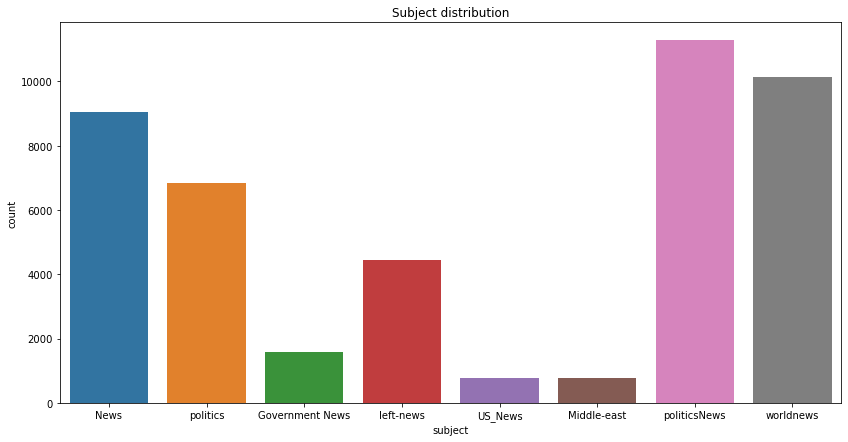

In [14]:
# visualize distribution of news topics
fig = plt.figure(figsize=(14,7))
plt.title('Subject distribution')
graph = sns.countplot(x='subject', data=df)
for subject in graph.patches:
    height = subject.get_height()

In [15]:
# combine title and text
df['text'] = df['title']+df['text']
df=df[['text','category']]

In [16]:
# clean text so that we dont waste processing time on unecessary words
spacey = spacy.load('en_core_web_sm')

# overkill
stopwords_sp = spacey.Defaults.stop_words
stopwords_nltk = set(stopwords.words('english'))
stopwords_gensim = gensim.parsing.preprocessing.STOPWORDS

stopwords = set(set(stopwords_sp) | set(stopwords_nltk) | set(stopwords_gensim))

In [17]:
def clean(text):
    text = text.lower()
    string = ''
    
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in stopwords:
            string += WordNetLemmatizer().lemmatize(word)+ ' '
    return string

In [18]:
df['text']=df['text'].apply(clean)

In [19]:
df.to_csv('./cleandata/cleaned.csv',index=False)